In [23]:
import pandas as pd

In [24]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv?_sm_au_=iVVb0jDn0PSH4HSMRMpVsKQtC6Vvq"

In [25]:
df = pd.read_csv(url)

In [26]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,43,43,47,48,50,50,50,53,59
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,274,293,331,360,420,461,502,511,581,639
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,108,110,110,117,130,138,150,150,160,178
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,29,36,50,50,83,93,99,117,129,149


In [27]:
swiss = df[df["Country/Region"] == "Switzerland"].stack().iloc[3:].droplevel(level=0)

In [28]:
italy = df[df["Country/Region"] == "Italy"].stack().iloc[3:].droplevel(level=0)

In [29]:
france = df[(df["Country/Region"] == "France") & (df["Province/State"] == "France")].stack().iloc[4:].droplevel(level=0)

In [30]:
spain = df[df["Country/Region"] == "Spain"].stack().iloc[3:].droplevel(level=0)

In [31]:
germany =  df[df["Country/Region"] == "Germany"].stack().iloc[3:].droplevel(level=0)

In [32]:
austria =  df[df["Country/Region"] == "Austria"].stack().iloc[3:].droplevel(level=0)

In [33]:
df2 = pd.concat([swiss, italy, france, germany, austria, spain], axis=1)

In [34]:
df2.columns = ['Switzerland', 'Italy', 'France', 'Germany', 'Austria', 'Spain']

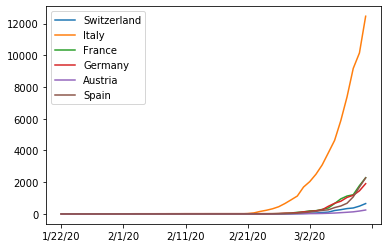

In [35]:
df2.plot()

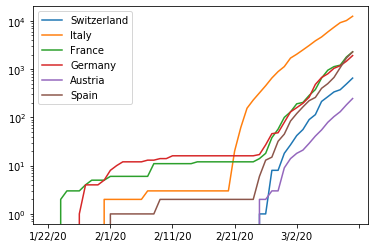

In [36]:
df2.plot(logy=True)

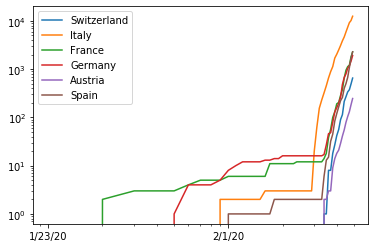

In [37]:
df2.plot(logy=True, logx=True)

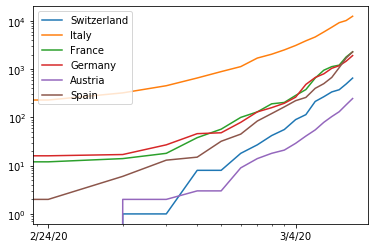

In [49]:
df2[32:].plot(logy=True, logx=True)

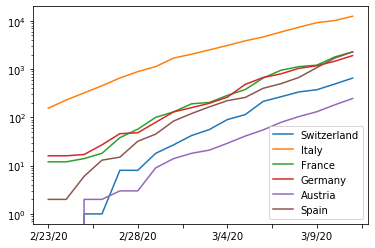

In [50]:
df2[32:].plot(logy=True)

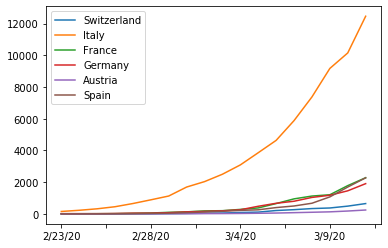

In [52]:
df2[32:].plot()